## Imports

In [3]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from tqdm import tqdm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from IPython.display import display

sns.set_style('whitegrid')
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [4]:
split_frac = 0.9
df = pd.read_csv('../processed_data/v3/BH_rf_impute.csv' , index_col='obs_id').sample(frac=1 , random_state=2)
train_bh = df.iloc[:int(len(df)*split_frac)]
test_bh = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v3/CV_rf_impute.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_cv = df.iloc[:int(len(df)*split_frac)]
test_cv = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v3/NS_rf_impute.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_ns = df.iloc[:int(len(df)*split_frac)]
test_ns = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v3/PULSAR_rf_impute.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_plsr = df.iloc[:int(len(df)*split_frac)]
test_plsr = df.iloc[int(len(df)*split_frac):]

inter_obs_params = ['var_inter_prob' , 'var_inter_index' , 'var_inter_sigma']

data = pd.concat([train_bh , train_ns , train_cv , train_plsr] , axis=0)
df = data.copy()

In [5]:
split_frac = 1
df = pd.read_csv('imp_data/BH_src_imp.csv' , index_col='obs_id').sample(frac=1 , random_state=2)
train_bh = df.copy()

df = pd.read_csv('imp_data/CV_src_imp.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_cv = df.copy()

df = pd.read_csv('imp_data/NS_src_imp.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_ns = df.copy()

df = pd.read_csv('imp_data/PULSAR_src_imp.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_plsr = df.copy()

inter_obs_params = ['var_inter_prob' , 'var_inter_index' , 'var_inter_sigma']

data = pd.concat([train_bh , train_ns , train_cv , train_plsr] , axis=0)


In [6]:
from sklearn.impute import KNNImputer
info_col = ['class' , 'src_id' , 'src_n' , 'significance']
imputer = KNNImputer(n_neighbors=2)
data_id = data[info_col]
data_val = data.drop(columns=info_col)
data_imp = imputer.fit_transform(data_val)
data_imp = pd.DataFrame(data_imp , columns=data_val.columns.to_list() ,  index=data_val.index.to_list())
data_imp_norm = (data_imp - data_imp.mean()) / data_imp.std()
display(data_val)
display(data_imp)
data_val_zero = data_val.replace(np.nan , 0)
df  = pd.concat([data_id , data_val_zero] , axis=1)

,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_53,-7.138705,NaN,NaN,-7.462055,NaN,-7.598944,-7.297483,-8.941574,NaN,NaN,...,NaN,NaN,-0.5965,NaN,NaN,NaN,NaN,NaN,0.5628,0.1537
BH_OBS_198,-5.353302,-5.861066,-7.064694,-5.458546,-5.742082,-6.395990,-6.199420,-7.019224,-6.025166,-5.597739,...,0.000736,-0.7951,-0.5091,0.5222,0.7626,0.2405,-0.5721,-0.3054,0.3579,-0.0887
BH_OBS_36,-4.988007,-5.545765,-5.614215,-5.048808,-5.468266,-6.311135,-5.404724,-6.651111,-5.646468,-5.119815,...,0.001534,-0.0831,0.6065,0.7096,0.8339,0.5628,0.0712,0.2180,0.8588,0.7458
BH_OBS_43,-6.822752,-6.858382,-6.342058,-7.036732,-7.858550,-7.088257,-7.305834,-7.447332,-7.423783,-7.513853,...,0.000278,0.2342,-1.0000,-0.9994,-0.7014,-1.0000,0.9994,1.0000,-0.2542,-0.9994
BH_OBS_170,-5.381534,-6.872247,-6.161025,-5.550985,-6.524474,-6.838234,-5.587036,-7.540390,-7.695898,-5.852015,...,0.004444,0.6902,0.4653,-0.6221,0.0581,-0.9425,0.8882,0.9975,1.0000,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_421,-4.749824,-5.510604,-5.497027,-4.834459,-5.371611,-5.565751,-5.253911,-5.930332,-5.727694,-4.939680,...,0.003907,-0.0556,-0.0906,-0.0137,0.3529,-0.3267,0.1674,0.4116,0.4853,0.1624
PULSAR_OBS_24,-3.456056,-4.103198,-3.944240,-3.463315,-4.091408,-4.223517,-3.920096,-4.238824,-4.115261,-3.470826,...,0.049673,0.1768,0.3042,0.1374,0.1580,0.1168,0.1949,0.2130,0.3429,0.3235
PULSAR_OBS_120,-4.688034,-5.573326,-5.998699,-4.747875,-5.459921,-5.065199,-5.585194,-5.151257,-5.726999,-4.817300,...,0.002678,-0.4179,-0.7776,-0.5284,-0.4016,-0.6465,-0.1761,0.0693,-0.5116,-0.6521


,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
BH_OBS_53,-7.138705,-7.017258,-8.005224,-7.462055,-7.761406,-7.598944,-7.297483,-8.941574,-7.640540,-8.338481,...,0.000561,0.0537,-0.5965,-0.9994,-0.0119,-1.0000,0.8426,1.0000,0.5628,0.1537
BH_OBS_198,-5.353302,-5.861066,-7.064694,-5.458546,-5.742082,-6.395990,-6.199420,-7.019224,-6.025166,-5.597739,...,0.000736,-0.7951,-0.5091,0.5222,0.7626,0.2405,-0.5721,-0.3054,0.3579,-0.0887
BH_OBS_36,-4.988007,-5.545765,-5.614215,-5.048808,-5.468266,-6.311135,-5.404724,-6.651111,-5.646468,-5.119815,...,0.001534,-0.0831,0.6065,0.7096,0.8339,0.5628,0.0712,0.2180,0.8588,0.7458
BH_OBS_43,-6.822752,-6.858382,-6.342058,-7.036732,-7.858550,-7.088257,-7.305834,-7.447332,-7.423783,-7.513853,...,0.000278,0.2342,-1.0000,-0.9994,-0.7014,-1.0000,0.9994,1.0000,-0.2542,-0.9994
BH_OBS_170,-5.381534,-6.872247,-6.161025,-5.550985,-6.524474,-6.838234,-5.587036,-7.540390,-7.695898,-5.852015,...,0.004444,0.6902,0.4653,-0.6221,0.0581,-0.9425,0.8882,0.9975,1.0000,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_421,-4.749824,-5.510604,-5.497027,-4.834459,-5.371611,-5.565751,-5.253911,-5.930332,-5.727694,-4.939680,...,0.003907,-0.0556,-0.0906,-0.0137,0.3529,-0.3267,0.1674,0.4116,0.4853,0.1624
PULSAR_OBS_24,-3.456056,-4.103198,-3.944240,-3.463315,-4.091408,-4.223517,-3.920096,-4.238824,-4.115261,-3.470826,...,0.049673,0.1768,0.3042,0.1374,0.1580,0.1168,0.1949,0.2130,0.3429,0.3235
PULSAR_OBS_120,-4.688034,-5.573326,-5.998699,-4.747875,-5.459921,-5.065199,-5.585194,-5.151257,-5.726999,-4.817300,...,0.002678,-0.4179,-0.7776,-0.5284,-0.4016,-0.6465,-0.1761,0.0693,-0.5116,-0.6521
PULSAR_OBS_10,-3.560667,-4.162285,-4.623058,-3.573814,-4.142366,-4.042345,-4.542421,-4.062532,-4.183162,-3.587371,...,0.034422,-0.4891,-0.5878,-0.1374,-0.1068,-0.1680,-0.4485,-0.4079,-0.5178,-0.5522


In [7]:
from features import features as feat 
all_feat = list(feat['info'])+list(feat['flux']['photon'])+list(feat['flux']['energy'])+list(feat['variability'])+list(feat['hardness'])+list(feat['model_fit']['powerlaw'])+list(feat['model_fit']['bb'])+list(feat['model_fit']['brems'])+list(feat['info_pre_filter'])
feat_to_drop = list(feat['model_fit']['powerlaw']) + list(feat['model_fit']['bb']) + list(feat['model_fit']['brems']) 
feat_to_drop = []
feat_used = [item for item in all_feat if item not in feat_to_drop]

In [8]:
from train_test_src import train_src , test_src 

In [9]:
inter_obs_params = ['var_inter_prob' , 'var_inter_index' , 'var_inter_sigma']
df = df.sample(frac=1)
df = df.drop(columns=inter_obs_params)
df = df[df['class'].isin(['NS' , 'BH' , 'PULSAR' , 'CV'])]
train_data = df[df['src_n'].isin(train_src)]
val_data = df[df['src_n'].isin(test_src)]

train_data.to_csv('current_data/train_data.csv')

val_data.to_csv('current_data/val_data.csv')

In [10]:
display(train_data)
#display(test_data)
display(val_data)

,class,src_id,src_n,significance,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_OBS_728,CV,CV0110,XMMSL2 J004231.9+41162,174.76,-3.517126,-4.186352,-4.106405,-3.526513,-4.171405,-4.125170,...,0.028980,0.0856,0.0119,-0.0712,-0.0418,-0.0981,0.1099,0.1343,0.0693,0.0400
CV_OBS_777,CV,CV0110,XMMSL2 J004231.9+41162,174.76,-3.584860,-4.222138,-4.108351,-3.593290,-4.208450,-4.173213,...,0.033946,0.1243,0.0668,-0.0562,-0.0331,-0.0806,0.1462,0.1680,0.1143,0.0912
PULSAR_OBS_160,PULSAR,PL0049,PSR J1400-6325,56.35,-3.545765,-4.694864,-3.812197,-3.573164,-4.624154,-5.381429,...,0.035761,0.7464,0.9225,0.6458,0.7851,0.4803,0.7833,0.8189,0.9725,0.9507
CV_OBS_565,CV,CV0085,CXOGLB J002407.9-72045,16.47,-5.429924,-6.129128,-6.293197,-5.484656,-6.045709,-6.039054,...,0.000568,-0.1868,-0.2917,-0.1099,0.0369,-0.2517,-0.0162,0.1455,0.0356,-0.1262
CV_OBS_645,CV,CV0091,CXOGLB J002410.7-72042,23.78,-4.956638,-5.792096,-5.408379,-5.057942,-5.619789,-6.288626,...,0.001880,0.3616,0.8701,0.9994,1.0000,0.6102,0.5759,0.7464,1.0000,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NS_OBS_71,NS,NS0009,2E 1613.5-5053,107.71,-3.208871,-3.931814,-3.563678,-3.214314,-3.922632,-4.869345,...,0.057846,0.3966,0.8988,0.7933,0.8114,0.7739,0.4072,0.4179,0.9163,0.9069
CV_OBS_352,CV,CV0066,CXOGLB J002359.3-72043,3.43,-6.159957,-7.130499,-6.946154,-6.384892,-6.806041,-6.547294,...,0.000125,-1.0000,-1.0000,-0.9994,-0.3254,-1.0000,-0.9994,0.1393,-0.4991,-0.9994
PULSAR_OBS_389,PULSAR,PL0105,PSR J1846+091,3.03,-5.514563,-6.394479,-6.470441,-5.635449,-6.183626,-6.111596,...,0.000496,-0.0106,-0.3567,-0.3610,-0.0019,-0.6590,0.3510,0.6527,0.3354,-0.0137


,class,src_id,src_n,significance,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
PULSAR_OBS_47,PULSAR,PL0010,PSR J0359+5414,9.65,-5.589391,-6.263843,-7.330869,-5.675512,-6.151565,-5.943858,...,0.000355,-0.7114,-0.8876,-0.3898,-0.1968,-0.5565,-0.4272,-0.1568,-0.5290,-0.7233
CV_OBS_345,CV,CV0062,2XMM J231519.0-591029,10.04,-4.859178,-5.569764,-6.045565,-4.900319,-5.508078,-5.232473,...,0.001552,-0.4953,-0.7364,-0.3748,-0.2854,-0.4591,-0.3448,-0.2030,-0.5428,-0.6408
CV_OBS_328,CV,CV0052,1WGA J1910.8-5958,14.00,-4.661145,-5.352813,-5.425390,-4.691009,-5.303469,-5.201971,...,0.002822,-0.0981,-0.2617,-0.1686,-0.0893,-0.2455,-0.0050,0.0856,-0.0843,-0.1736
NS_OBS_436,NS,NS0080,4U1745-203,2.50,-5.981300,-6.675101,-6.838033,-6.127494,-6.492279,-7.185819,...,0.000437,-0.0831,0.3779,0.5147,0.8314,0.1168,0.2936,0.6015,0.9413,0.7146
NS_OBS_150,NS,NS0043,XB 1732-304,4.89,-5.235226,-5.639785,-6.726073,-5.316053,-5.553152,-6.466864,...,0.001440,-0.7889,-0.1880,0.7295,0.8688,0.5440,-0.6034,-0.3991,0.5915,0.2311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NS_OBS_138,NS,NS0033,KS 1731-260,14.81,-4.570248,-5.018907,-5.551758,-4.606952,-4.975104,-5.506821,...,0.004045,-0.5428,-0.0643,0.5097,0.5903,0.4254,-0.4485,-0.3542,0.2230,0.0812
NS_OBS_75,NS,NS0011,3A 2129+470,41.03,-4.266963,-4.982549,-6.058389,-4.290730,-4.941574,-4.533429,...,0.006520,-0.8401,-0.9400,-0.4772,-0.4291,-0.5228,-0.7708,-0.6977,-0.8826,-0.9132
BH_OBS_112,BH,BH0022,CXOU J100517.1-07421,11.12,-6.266963,-6.881074,-7.427234,-6.369572,-6.740167,-6.666150,...,0.000085,-1.0000,-1.0000,-0.2573,-0.0056,-0.4853,-0.9994,-0.6740,-0.7851,-0.9994


In [11]:
def abt_data(d):
    print('total sources:' , len((np.unique(d['src_n']))))
    print('total obs : ' , len(d))
    print(d['class'].value_counts())
    print('CV src :' ,  len( np.unique(d[d['class']=='CV']['src_id']) ))
    print('PULSAR src :' ,  len( np.unique(d[d['class']=='PULSAR']['src_id']) ))
    print('XRB src :' ,  len( np.unique(d[d['class']=='XRB']['src_id']) ))
    print('NS src :' ,  len( np.unique(d[d['class']=='NS']['src_id']) ))
    print('BH src :' ,  len( np.unique(d[d['class']=='BH']['src_id']) ))
abt_data(train_data)
print('------------------------------------')
abt_data(val_data)

total sources: 217
total obs :  1178
CV        502
PULSAR    278
NS        275
BH        123
Name: class, dtype: int64
CV src : 56
PULSAR src : 109
XRB src : 0
NS src : 37
BH src : 20
------------------------------------
total sources: 34
total obs :  117
PULSAR    41
BH        35
NS        27
CV        14
Name: class, dtype: int64
CV src : 10
PULSAR src : 9
XRB src : 0
NS src : 11
BH src : 7


In [12]:
val_data

,class,src_id,src_n,significance,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
PULSAR_OBS_47,PULSAR,PL0010,PSR J0359+5414,9.65,-5.589391,-6.263843,-7.330869,-5.675512,-6.151565,-5.943858,...,0.000355,-0.7114,-0.8876,-0.3898,-0.1968,-0.5565,-0.4272,-0.1568,-0.5290,-0.7233
CV_OBS_345,CV,CV0062,2XMM J231519.0-591029,10.04,-4.859178,-5.569764,-6.045565,-4.900319,-5.508078,-5.232473,...,0.001552,-0.4953,-0.7364,-0.3748,-0.2854,-0.4591,-0.3448,-0.2030,-0.5428,-0.6408
CV_OBS_328,CV,CV0052,1WGA J1910.8-5958,14.00,-4.661145,-5.352813,-5.425390,-4.691009,-5.303469,-5.201971,...,0.002822,-0.0981,-0.2617,-0.1686,-0.0893,-0.2455,-0.0050,0.0856,-0.0843,-0.1736
NS_OBS_436,NS,NS0080,4U1745-203,2.50,-5.981300,-6.675101,-6.838033,-6.127494,-6.492279,-7.185819,...,0.000437,-0.0831,0.3779,0.5147,0.8314,0.1168,0.2936,0.6015,0.9413,0.7146
NS_OBS_150,NS,NS0043,XB 1732-304,4.89,-5.235226,-5.639785,-6.726073,-5.316053,-5.553152,-6.466864,...,0.001440,-0.7889,-0.1880,0.7295,0.8688,0.5440,-0.6034,-0.3991,0.5915,0.2311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NS_OBS_138,NS,NS0033,KS 1731-260,14.81,-4.570248,-5.018907,-5.551758,-4.606952,-4.975104,-5.506821,...,0.004045,-0.5428,-0.0643,0.5097,0.5903,0.4254,-0.4485,-0.3542,0.2230,0.0812
NS_OBS_75,NS,NS0011,3A 2129+470,41.03,-4.266963,-4.982549,-6.058389,-4.290730,-4.941574,-4.533429,...,0.006520,-0.8401,-0.9400,-0.4772,-0.4291,-0.5228,-0.7708,-0.6977,-0.8826,-0.9132
BH_OBS_112,BH,BH0022,CXOU J100517.1-07421,11.12,-6.266963,-6.881074,-7.427234,-6.369572,-6.740167,-6.666150,...,0.000085,-1.0000,-1.0000,-0.2573,-0.0056,-0.4853,-0.9994,-0.6740,-0.7851,-0.9994


In [26]:

# enaable these two lines for NS-BH
train_data = pd.read_csv('current_data/train_data.csv' , index_col='obs_id')
#test_data = pd.read_csv('current_data/test_data.csv' , index_col='obs_id')
val_data = pd.read_csv('current_data/val_data.csv' , index_col='obs_id')

train_data = train_data.replace('NS' , 'XRB')
train_data = train_data.replace('BH' , 'XRB')

#test_data = test_data.replace('NS' , 'XRB')
#test_data = test_data.replace('BH' , 'XRB')
val_data = val_data.replace('BH' , 'XRB')
val_data = val_data.replace('NS' , 'XRB')

class_to_select = ['CV' , 'XRB',  'PULSAR']
data = train_data[train_data['class'].isin(class_to_select)]
display(data)
#display(val_data)


,class,src_id,src_n,significance,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_OBS_728,CV,CV0110,XMMSL2 J004231.9+41162,174.76,-3.517126,-4.186352,-4.106405,-3.526513,-4.171405,-4.125170,...,0.028980,0.0856,0.0119,-0.0712,-0.0418,-0.0981,0.1099,0.1343,0.0693,0.0400
CV_OBS_777,CV,CV0110,XMMSL2 J004231.9+41162,174.76,-3.584860,-4.222138,-4.108351,-3.593290,-4.208450,-4.173213,...,0.033946,0.1243,0.0668,-0.0562,-0.0331,-0.0806,0.1462,0.1680,0.1143,0.0912
PULSAR_OBS_160,PULSAR,PL0049,PSR J1400-6325,56.35,-3.545765,-4.694864,-3.812197,-3.573164,-4.624154,-5.381429,...,0.035761,0.7464,0.9225,0.6458,0.7851,0.4803,0.7833,0.8189,0.9725,0.9507
CV_OBS_565,CV,CV0085,CXOGLB J002407.9-72045,16.47,-5.429924,-6.129128,-6.293197,-5.484656,-6.045709,-6.039054,...,0.000568,-0.1868,-0.2917,-0.1099,0.0369,-0.2517,-0.0162,0.1455,0.0356,-0.1262
CV_OBS_645,CV,CV0091,CXOGLB J002410.7-72042,23.78,-4.956638,-5.792096,-5.408379,-5.057942,-5.619789,-6.288626,...,0.001880,0.3616,0.8701,0.9994,1.0000,0.6102,0.5759,0.7464,1.0000,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NS_OBS_71,XRB,NS0009,2E 1613.5-5053,107.71,-3.208871,-3.931814,-3.563678,-3.214314,-3.922632,-4.869345,...,0.057846,0.3966,0.8988,0.7933,0.8114,0.7739,0.4072,0.4179,0.9163,0.9069
CV_OBS_352,CV,CV0066,CXOGLB J002359.3-72043,3.43,-6.159957,-7.130499,-6.946154,-6.384892,-6.806041,-6.547294,...,0.000125,-1.0000,-1.0000,-0.9994,-0.3254,-1.0000,-0.9994,0.1393,-0.4991,-0.9994
PULSAR_OBS_389,PULSAR,PL0105,PSR J1846+091,3.03,-5.514563,-6.394479,-6.470441,-5.635449,-6.183626,-6.111596,...,0.000496,-0.0106,-0.3567,-0.3610,-0.0019,-0.6590,0.3510,0.6527,0.3354,-0.0137


In [27]:
info_col = [ 'class' ,  'significance' , 'src_n' , 'src_id']
data_info = data[info_col]
data_val = data.drop(columns=info_col) 
data_label = data['class']

In [28]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Hyper Parameter Tuning

In [175]:
rfc_v2 = RandomForestClassifier()

## Random Search

In [176]:
from sklearn.model_selection import RandomizedSearchCV

In [177]:
n_estimators = [int(x) for x in np.linspace(80 , 800 , num=40)]
max_features = ['log2' , 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 150, num = 40)]
min_samples_split = [int(x) for x in np.linspace(2,20 ,num = 30)]
min_samples_leaf = [int(x) for x in np.linspace(2,30 , num = 30)]
bootstrap = [True , False]

In [178]:
params_dict = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features ,
    'max_depth' :max_depth , 
    'min_samples_split' : min_samples_split , 
    'min_samples_leaf' : min_samples_leaf, 
    'bootstrap' : bootstrap 
}

In [179]:
rs = RandomizedSearchCV(
    rfc_v2 , 
    params_dict , 
    n_iter = 100,
    cv = 5 ,
    verbose = 5 ,
    n_jobs=-1 , 
    random_state= 0 
)

In [180]:
rs.fit(data_val , data_label)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,393,6,18,log2,1,True,0.397683,0.399225,0.397992,1
1,135,9,30,sqrt,1,False,0.397683,0.399225,0.397992,1
2,763,9,7,sqrt,1,False,0.397683,0.399225,0.397992,1
3,523,16,26,sqrt,1,False,0.397683,0.399225,0.397992,1
4,135,9,20,log2,123,True,0.335907,0.387597,0.367867,5
5,98,8,15,sqrt,58,True,0.343629,0.399225,0.367104,6
6,596,12,30,log2,65,True,0.328185,0.403101,0.364790,7
7,578,18,30,sqrt,62,True,0.332046,0.399225,0.364015,8
8,578,15,12,log2,4,True,0.351351,0.395349,0.364012,9
9,301,6,17,sqrt,107,True,0.347490,0.387597,0.364006,10


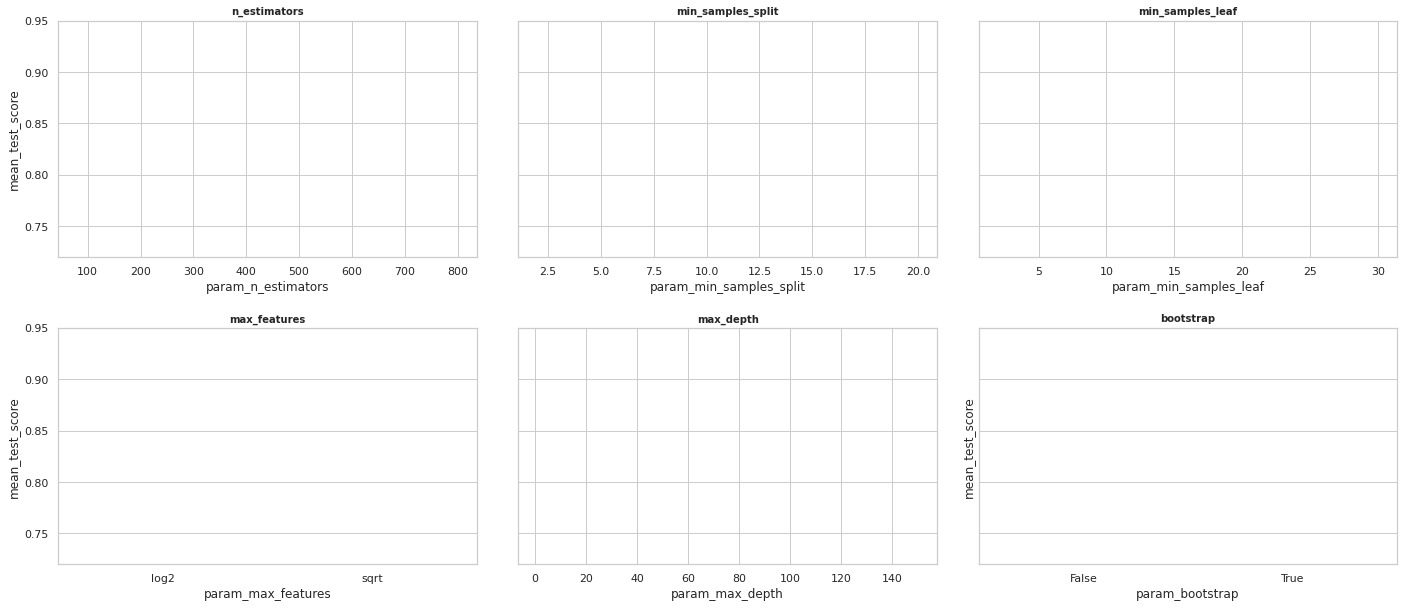

In [ ]:
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, axs = plt.subplots(ncols=3, nrows=2  , sharey=True)
fig.set_size_inches(24,10)
colors = sns.diverging_palette(240, 0, n=6 , center='dark')
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0],color=colors[5]) 
axs[0,0].set_ylim([.72,.95])
axs[0,0].set_title(label = 'n_estimators', size=10, weight='bold')
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1],color=colors[4])
#axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=10, weight='bold')
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2],color=colors[3])
#axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=10, weight='bold')
sns.boxplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0],color=colors[0])
#axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=10, weight='bold')
sns.lineplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1],color=colors[1])
#axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=10, weight='bold')
sns.boxplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2] , color=colors[2])
#axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=10, weight='bold')
fig.subplots_adjust(wspace=0.1 , hspace=0.3)

plt.show()


### Result
> Best Model Parameters
```

{'n_estimators': 288,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 150,
 'bootstrap': False}
```
> Best Parameter values

```
{'n_estimators': [136 , 309 , 347,385],
 'min_samples_split': [7,12,44],
 'min_samples_leaf': [2,7,12],
 'max_features': 'sqrt',
 'max_depth': [43 ,85, 100],
 'bootstrap': False}
```

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [140 , 170 , 230]
max_features = ['sqrt'] 
bootstrap = [False]
max_depth =  [56 ,85, 100]
min_samples_leaf = [2,12]
min_samples_split = [7,18,28]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
gs = GridSearchCV(rfc_v2 , param_grid , cv=5 , verbose=5 , n_jobs=-1)
gs.fit(data_val , data_label)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [56, 85, 100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 12],
                         'min_samples_split': [7, 18, 28],
                         'n_estimators': [140, 170, 230]},
             verbose=5)

In [ ]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 18,
 'n_estimators': 140}

# Best Random Forest

So Now we have identified best random Forest , lets see how its various performance are.

## Load Data

In [29]:
np.random.seed(433)
data = data.sample(frac=1)


In [30]:
data_label = data['class']
x = data.copy()
y = data_label.copy()

## Train and save model

{'n_estimators': 402,
 'min_samples_split': 16,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': False}

In [31]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier

In [32]:
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import KFold
import xgboost as xgb

In [33]:
# Find and fit besst model
train_acc = []
test_acc = []
val_acc = []
best_clf = ''
score = 0 
for i in tqdm(range(10)):
    rs = int(np.random.uniform(10 , 99999))
    '''
    27601 0.958974358974359
    79324
    '''
    #rs = 31544 # all
    #rs = 31374 # CV-XRB 
    #rs = 65845 # xrb-pulsar
    #rs = 59360 #cv-pulsar
    #rs = 31544 # NS-BH

    np.random.seed(rs)
    df =  x.sample(frac=1 , random_state=rs)
    y = df['class']
    x_train , x_test , _ , _ = train_test_split(df , y , test_size=0.1 , shuffle=True, random_state=10 , stratify=y)
    info_col = ['significance' , 'class','src_n' , 'src_id']
    id_train = x_train[info_col]
    id_test = x_test[info_col]
    sig_train = id_train['significance']
    y_train = x_train['class']
    y_test = x_test['class']
    x_train = x_train.drop(columns = info_col)
    #x_train = (x_train - x_train.mean()) / x_train.std()
    x_test = x_test.drop(columns=info_col )
    #display(x_test)
    #x_test = (x_test - x_test.mean()) / x_test.std()
    #np.random.seed(5926)


    info_col = [ 'significance' , 'class' , 'src_n' , 'src_id']
    x_val = val_data.copy()
    y_val = x_val['class']
    id_val = x_val[info_col]
    x_val = x_val.drop(columns=info_col)

    
   # x_val 
    
    clf = RandomForestClassifier(
        n_estimators= 100 , 
        criterion='entropy' ,
        random_state=12,
        max_depth=85 , 
        min_samples_leaf= 2 , 
        min_samples_split=2 , 
        bootstrap=False ,
        max_features='sqrt' ,
        class_weight='balanced' , 
        #sample_weight = sig_train
        )
    #clf_br = BernoulliRBM(n_components=1)
    
    #clf = GradientBoostingClassifier(
    #    max_depth = 10 ,
    #    n_estimators= 200 
    #)
    #clf = xgb.XGBRFClassifier(random_state=42)
    #clf = AdaBoostClassifier(base_estimator=clf_rf)
    clf.fit(x_train , y_train)
    tr = clf.score(x_train , y_train)
    test_score = clf.score(x_test , y_test)
    val_score = clf.score(x_val , y_val)
    train_score = clf.score(x_train , y_train)
    print(test_score , train_score , val_score)
    train_acc.append(train_score)
    test_acc.append(test_score)
    val_acc.append(val_score)
    
    '''
    if(next_score > score):
        best_clf = clf
        score = next_score
        print('better found' , rs , next_score)
    '''
    #print(next_score , score)
    #print('\n -----------------')
    #print(rs , tst)
    ##train_acc.append(tr)
    #test_acc.append(tst)

 10%|█         | 1/10 [00:01<00:12,  1.40s/it]

0.7711864406779662 1.0 0.5042735042735043


 20%|██        | 2/10 [00:02<00:10,  1.33s/it]

0.6864406779661016 1.0 0.5042735042735043


 30%|███       | 3/10 [00:03<00:09,  1.29s/it]

0.847457627118644 1.0 0.47863247863247865


 40%|████      | 4/10 [00:05<00:07,  1.26s/it]

0.8220338983050848 1.0 0.5213675213675214


 50%|█████     | 5/10 [00:06<00:06,  1.27s/it]

0.8220338983050848 1.0 0.47863247863247865


 60%|██████    | 6/10 [00:07<00:05,  1.28s/it]

0.8305084745762712 1.0 0.5213675213675214


 70%|███████   | 7/10 [00:09<00:03,  1.28s/it]

0.8050847457627118 1.0 0.5042735042735043


 80%|████████  | 8/10 [00:10<00:02,  1.28s/it]

0.8050847457627118 1.0 0.5213675213675214


 90%|█████████ | 9/10 [00:11<00:01,  1.25s/it]

0.788135593220339 1.0 0.49572649572649574


100%|██████████| 10/10 [00:12<00:00,  1.26s/it]

0.7627118644067796 1.0 0.48717948717948717


In [34]:
score = pd.DataFrame(np.asarray([train_acc , test_acc , val_acc ]).T , columns=['train_score' ,'test_sc' ,'val_score' ])

In [35]:
score.describe()

,train_score,test_sc,val_score
count,10.0,10.000000,10.000000
mean,1.0,0.794068,0.501709
std,0.0,0.046081,0.016637
min,1.0,0.686441,0.478632
25%,1.0,0.775424,0.489316
50%,1.0,0.805085,0.504274
75%,1.0,0.822034,0.517094
max,1.0,0.847458,0.521368


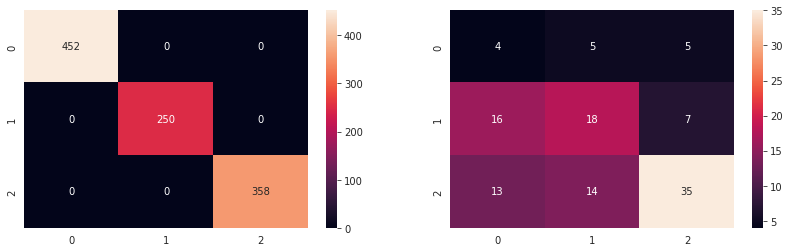

In [40]:
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize = (14,4))
#sns.boxplot(data = score , ax = ax[0])
cf = confusion_matrix(y_train , clf.predict(x_train))
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[0])
#cf = confusion_matrix(y_test , clf.predict(x_test))
#sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[0])
cf = confusion_matrix(y_val , clf.predict(x_val))
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[1])
plt.show()

In [251]:
df_tuc = df[df['class']=='TUC']
df_tuc

,class,src_id,src_n,significance,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,


### Test performance

In [252]:
info_col = [ 'significance' , 'class' , 'src_n' , 'src_id']
x_val = val_data.copy()
y_val = x_val['class']
id_val = x_val[info_col]
x_val = x_val.drop(columns=info_col)
x_val 

,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_112,-1.542626,-1.235139,-1.479510,-1.478876,-1.203048,-1.059668,-2.471388,-0.703587,-0.874489,-1.144137,...,-0.047214,-1.863930,-1.311735,-0.155209,-0.290693,-0.247282,-2.142529,-2.364697,-1.806662,-1.522745
PULSAR_OBS_47,-0.752783,-0.534362,-1.390442,-0.710915,-0.522901,-0.258345,-1.212164,-0.043265,-0.253829,-0.479565,...,-0.046790,-1.314755,-1.136674,-0.380047,-0.687949,-0.395368,-1.160639,-1.251883,-1.364760,-1.119552
PULSAR_OBS_38,-0.151175,0.068261,0.106490,-0.091638,0.034976,-0.109162,-0.141946,0.109906,0.292093,0.083968,...,-0.045822,0.042577,0.318635,0.406463,0.181569,0.623140,-0.234690,-0.437498,0.118140,0.210356
PULSAR_OBS_50,-0.044904,0.318428,-0.284044,0.021241,0.264305,0.226975,-0.557243,0.435456,0.515839,0.188437,...,-0.045032,-1.119899,-0.716310,0.270882,-0.127177,0.586742,-1.321427,-1.840564,-1.198939,-0.833184
NS_OBS_79,1.792586,1.926859,1.017118,1.793039,1.865903,2.240531,0.898224,2.061479,1.821110,1.668369,...,0.033588,-1.138928,-1.047119,-0.456238,-1.152523,-0.166792,-1.452186,-2.152333,-1.847729,-1.260034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BH_OBS_16,0.962757,1.190372,1.118022,0.991835,1.135651,0.888529,1.031469,0.964602,1.221039,0.998787,...,-0.029897,0.299277,0.723424,0.601437,0.231019,1.036201,-0.112511,-0.421360,0.258251,0.462115
PULSAR_OBS_36,-0.160856,0.056658,0.129949,-0.103902,0.027430,-0.246633,-0.111123,-0.027359,0.278021,0.070767,...,-0.046025,0.125733,0.561913,0.618406,0.477434,0.841317,-0.151121,-0.327120,0.411304,0.451162
NS_OBS_138,0.435228,0.879081,0.253955,0.471422,0.836534,0.226511,0.101955,0.399369,0.958329,0.552691,...,-0.040995,-0.993928,0.145599,1.146310,0.947410,1.646848,-1.197190,-1.676611,-0.067179,0.055271


In [253]:
x_val

,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_112,-1.542626,-1.235139,-1.479510,-1.478876,-1.203048,-1.059668,-2.471388,-0.703587,-0.874489,-1.144137,...,-0.047214,-1.863930,-1.311735,-0.155209,-0.290693,-0.247282,-2.142529,-2.364697,-1.806662,-1.522745
PULSAR_OBS_47,-0.752783,-0.534362,-1.390442,-0.710915,-0.522901,-0.258345,-1.212164,-0.043265,-0.253829,-0.479565,...,-0.046790,-1.314755,-1.136674,-0.380047,-0.687949,-0.395368,-1.160639,-1.251883,-1.364760,-1.119552
PULSAR_OBS_38,-0.151175,0.068261,0.106490,-0.091638,0.034976,-0.109162,-0.141946,0.109906,0.292093,0.083968,...,-0.045822,0.042577,0.318635,0.406463,0.181569,0.623140,-0.234690,-0.437498,0.118140,0.210356
PULSAR_OBS_50,-0.044904,0.318428,-0.284044,0.021241,0.264305,0.226975,-0.557243,0.435456,0.515839,0.188437,...,-0.045032,-1.119899,-0.716310,0.270882,-0.127177,0.586742,-1.321427,-1.840564,-1.198939,-0.833184
NS_OBS_79,1.792586,1.926859,1.017118,1.793039,1.865903,2.240531,0.898224,2.061479,1.821110,1.668369,...,0.033588,-1.138928,-1.047119,-0.456238,-1.152523,-0.166792,-1.452186,-2.152333,-1.847729,-1.260034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BH_OBS_16,0.962757,1.190372,1.118022,0.991835,1.135651,0.888529,1.031469,0.964602,1.221039,0.998787,...,-0.029897,0.299277,0.723424,0.601437,0.231019,1.036201,-0.112511,-0.421360,0.258251,0.462115
PULSAR_OBS_36,-0.160856,0.056658,0.129949,-0.103902,0.027430,-0.246633,-0.111123,-0.027359,0.278021,0.070767,...,-0.046025,0.125733,0.561913,0.618406,0.477434,0.841317,-0.151121,-0.327120,0.411304,0.451162
NS_OBS_138,0.435228,0.879081,0.253955,0.471422,0.836534,0.226511,0.101955,0.399369,0.958329,0.552691,...,-0.040995,-0.993928,0.145599,1.146310,0.947410,1.646848,-1.197190,-1.676611,-0.067179,0.055271


In [254]:
test_score =  clf.score(x_val , y_val)
print(test_score)

0.7184466019417476


In [255]:
x_val

,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_112,-1.542626,-1.235139,-1.479510,-1.478876,-1.203048,-1.059668,-2.471388,-0.703587,-0.874489,-1.144137,...,-0.047214,-1.863930,-1.311735,-0.155209,-0.290693,-0.247282,-2.142529,-2.364697,-1.806662,-1.522745
PULSAR_OBS_47,-0.752783,-0.534362,-1.390442,-0.710915,-0.522901,-0.258345,-1.212164,-0.043265,-0.253829,-0.479565,...,-0.046790,-1.314755,-1.136674,-0.380047,-0.687949,-0.395368,-1.160639,-1.251883,-1.364760,-1.119552
PULSAR_OBS_38,-0.151175,0.068261,0.106490,-0.091638,0.034976,-0.109162,-0.141946,0.109906,0.292093,0.083968,...,-0.045822,0.042577,0.318635,0.406463,0.181569,0.623140,-0.234690,-0.437498,0.118140,0.210356
PULSAR_OBS_50,-0.044904,0.318428,-0.284044,0.021241,0.264305,0.226975,-0.557243,0.435456,0.515839,0.188437,...,-0.045032,-1.119899,-0.716310,0.270882,-0.127177,0.586742,-1.321427,-1.840564,-1.198939,-0.833184
NS_OBS_79,1.792586,1.926859,1.017118,1.793039,1.865903,2.240531,0.898224,2.061479,1.821110,1.668369,...,0.033588,-1.138928,-1.047119,-0.456238,-1.152523,-0.166792,-1.452186,-2.152333,-1.847729,-1.260034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BH_OBS_16,0.962757,1.190372,1.118022,0.991835,1.135651,0.888529,1.031469,0.964602,1.221039,0.998787,...,-0.029897,0.299277,0.723424,0.601437,0.231019,1.036201,-0.112511,-0.421360,0.258251,0.462115
PULSAR_OBS_36,-0.160856,0.056658,0.129949,-0.103902,0.027430,-0.246633,-0.111123,-0.027359,0.278021,0.070767,...,-0.046025,0.125733,0.561913,0.618406,0.477434,0.841317,-0.151121,-0.327120,0.411304,0.451162
NS_OBS_138,0.435228,0.879081,0.253955,0.471422,0.836534,0.226511,0.101955,0.399369,0.958329,0.552691,...,-0.040995,-0.993928,0.145599,1.146310,0.947410,1.646848,-1.197190,-1.676611,-0.067179,0.055271


In [256]:
pred = clf.predict(x_val)
for s , p in zip(pred , x_val.index.to_list()):
    print(s , p)

XRB BH_OBS_112
XRB PULSAR_OBS_47
PULSAR PULSAR_OBS_38
XRB PULSAR_OBS_50
PULSAR NS_OBS_79
XRB BH_OBS_194
PULSAR NS_OBS_80
XRB BH_OBS_110
PULSAR PULSAR_OBS_42
PULSAR PULSAR_OBS_43
PULSAR PULSAR_OBS_30
PULSAR PULSAR_OBS_34
XRB BH_OBS_117
XRB NS_OBS_150
XRB BH_OBS_101
PULSAR NS_OBS_434
XRB BH_OBS_104
XRB PULSAR_OBS_39
XRB BH_OBS_97
XRB BH_OBS_95
XRB BH_OBS_106
XRB BH_OBS_116
XRB BH_OBS_100
XRB PULSAR_OBS_32
PULSAR NS_OBS_360
XRB PULSAR_OBS_51
PULSAR BH_OBS_15
XRB PULSAR_OBS_46
PULSAR PULSAR_OBS_28
XRB NS_OBS_323
XRB PULSAR_OBS_41
PULSAR NS_OBS_321
PULSAR BH_OBS_14
PULSAR BH_OBS_12
PULSAR PULSAR_OBS_33
XRB NS_OBS_73
XRB NS_OBS_137
PULSAR PULSAR_OBS_52
PULSAR PULSAR_OBS_23
XRB BH_OBS_107
XRB PULSAR_OBS_29
XRB BH_OBS_98
PULSAR NS_OBS_359
PULSAR BH_OBS_10
PULSAR PULSAR_OBS_0
XRB BH_OBS_111
XRB NS_OBS_149
XRB BH_OBS_118
XRB BH_OBS_13
PULSAR PULSAR_OBS_26
PULSAR PULSAR_OBS_24
XRB BH_OBS_114
XRB PULSAR_OBS_2
PULSAR PULSAR_OBS_27
XRB BH_OBS_113
XRB PULSAR_OBS_444
XRB BH_OBS_195
PULSAR PULSAR_OBS_3

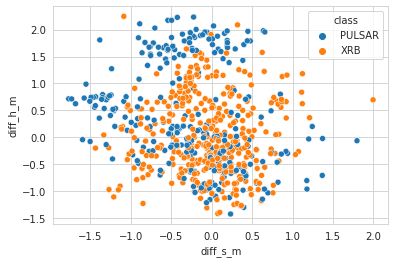

In [257]:
df['diff_s_m'] = df['flux_aper_s'] - df['flux_aper_m']
df['diff_h_m'] = df['flux_aper_h'] - df['flux_aper_m']
sns.scatterplot(
    data = df , 
    #kind = 'scatter' ,
    x = 'diff_s_m' , 
    y = 'diff_h_m' , 
    hue = 'class'
    )
plt.show()

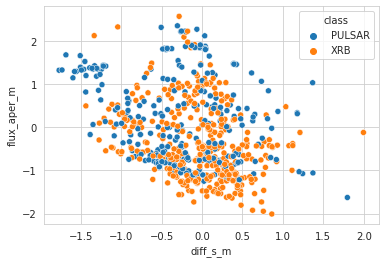

In [258]:
sns.scatterplot(
    data = df , 
    #kind = 'scatter' ,
    x = 'diff_s_m' , 
    y = 'flux_aper_m' , 
    hue = 'class'
    )
plt.show()

In [259]:
feat_imp = clf.feature_importances_
feat_names = x_train.columns.to_list()
feat = pd.DataFrame()
feat.insert( 0 , 'feat_name' , feat_names)
feat.insert(1 , 'feat_imp' , feat_imp)
feat = feat.sort_values(by = 'feat_imp' , ascending=False).reset_index(drop=True)
feat_names_sorted = feat['feat_name']
display(feat)
#feat.to_csv('result/feat_imp.csv')

,feat_name,feat_imp
0,photflux_aper_lolim_b,0.053209
1,photflux_aper_b,0.049345
2,flux_aper_lolim,0.038930
3,photflux_aper_hilim_b,0.034909
4,photflux_aper_lolim,0.033743
5,flux_aper_lolim_b,0.031884
6,var_sigma,0.031576
7,var_prob,0.029788
8,flux_aper_lolim_h,0.029468
9,photflux_aper_lolim_h,0.028215


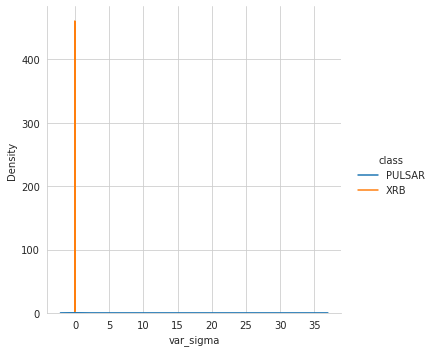

In [260]:
sns.displot(
    data = df , 
    #kind = 'scatter' ,
    x = 'var_sigma' , 
    #y = 'flux_aper_m' , 
    hue = 'class' , 
    kind='kde'
    )
plt.show()

### Save model


In [ ]:
import joblib 
joblib.dump(best_clf , 'forest/v2/all-clf-no-norm.joblib' , compress=3)

['forest/v2/all-clf-no-norm.joblib']